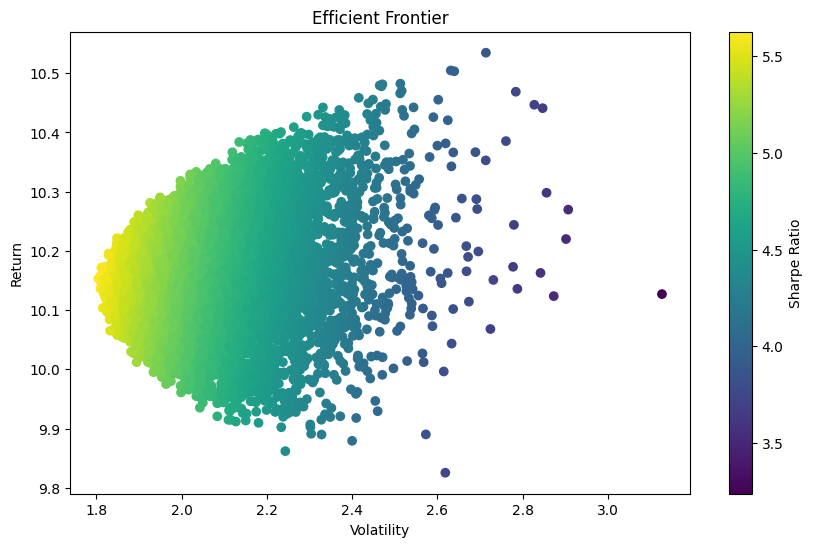

Optimal Weights:
AAPL: 0.1296
MSFT: 0.1453
AMZN: 0.1582
GOOG: 0.1518
FB: 0.1548
TSLA: 0.1193
JPM: 0.1409


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Simulate adjusted close prices
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start='2022-01-01', periods=502, freq='B')
prices = np.random.rand(502, 7) * 100 + 100  # Prices between 100 and 200
data = pd.DataFrame(prices, index=dates, columns=['AAPL', 'MSFT', 'AMZN', 'GOOG', 'FB', 'TSLA', 'JPM'])

# Step 2: Calculate daily returns
daily_returns = data.pct_change()

# Step 3: Calculate mean returns, variances, and the correlation matrix
mean_returns = daily_returns.mean()
variances = daily_returns.var()
correlation_matrix = daily_returns.corr()

# Step 4 & 5: Calculate Efficient Frontier through Monte Carlo Simulation
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(data.columns)))
return_array = np.zeros(num_portfolios)
volatility_array = np.zeros(num_portfolios)
sharpe_array = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.array(np.random.random(len(data.columns)))
    weights /= np.sum(weights)  # Normalize weights
    all_weights[i, :] = weights
    return_array[i] = np.dot(weights, mean_returns * 252)  # Annualized return
    volatility_array[i] = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))  # Annualized volatility
    sharpe_array[i] = return_array[i] / volatility_array[i]

# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(volatility_array, return_array, c=sharpe_array, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()

# Step 6: Output the Calculated Optimal Weighting
max_index = sharpe_array.argmax()  # Find the max Sharpe ratio
optimal_weights = all_weights[max_index, :]

print("Optimal Weights:")
for asset, weight in zip(data.columns, optimal_weights):
    print(f"{asset}: {weight:.4f}")
